In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [4]:
df=pd.read_csv('churn_df.csv')

Data set taken from google advanced data analytics course

We are building a classification model to predict if a customer. churn or exit happens

Navive Bayes GaussianNB is a supervised machine learning classification model that is usually used with independent categorical variables only but here we are using it with continuous variables as well.
Naive Bayes helps to anlyse posterior probability

In [5]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [6]:
df=df.drop(columns=['Age','Tenure'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Balance            10000 non-null  float64
 2   NumOfProducts      10000 non-null  int64  
 3   HasCrCard          10000 non-null  int64  
 4   IsActiveMember     10000 non-null  int64  
 5   EstimatedSalary    10000 non-null  float64
 6   Exited             10000 non-null  int64  
 7   Loyalty            10000 non-null  float64
 8   Geography_Germany  10000 non-null  int64  
 9   Geography_Spain    10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


Loyalty has been created in this dataset by the google course using age and tenure so we are dropping them as we want the variables to be independent for naive bayes classification

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.137936,0.250900,0.247700
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.089506,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.064516,0.000000,0.000000
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.129032,0.000000,0.000000
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.200000,1.000000,0.000000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,0.555556,1.000000,1.000000


By looking at the code we can see that it has already undergone hash encoding for geography variables

In [10]:
df.Exited.unique()

array([1, 0])

In [18]:
df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

The class is unbalennced but it is not extrem as it is not greater than 90% for majority class so we will not touch it.
Notice below that we include the argument stratify=y. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. stratify=y tells the function that it should use the class ratio found in the y variable (our target).

modeling

In [11]:
X=df.drop(columns=['Exited'],axis=1)

In [12]:
Y=df['Exited']

Scaling data

In [14]:
X=MinMaxScaler().fit(X).transform(X)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=42)

In [27]:
clf=GaussianNB()

In [28]:
clf.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred=clf.predict(X_test)

In [31]:
import matplotlib.pyplot as plt

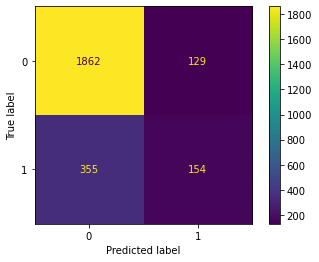

In [32]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,labels=clf.classes_),display_labels=clf.classes_).plot()
plt.show()

In [33]:
precision_score(y_test,y_pred)

0.5441696113074205

In [34]:
recall_score(y_test,y_pred)

0.3025540275049116

In [35]:
accuracy_score(y_test,y_pred)

0.8064

In [36]:
f1_score(y_test,y_pred)

0.3888888888888889

All of our model metrics can be derived from the confusion matrix, and each metric tells its own part of the story. What stands out most in the confusion matrix is that the model misses a lot of customers who will churn. In other words, there are a lot of false negatives—355, to be exact. This is why our recall score is only 0.303.

Would we use this model? It depends. For one thing, we'd certainly want to develop other models to see if they perform better.